## Stock Price Example
In this problem, we choose the first stock price example. 
The experimental parameters are as follow:
1. f is f(x) = 0.01\*x;
2. discount factor gamma = 0.7;
3. level-param = 15;
4. maximum round per simulation = 100;
5. number of simulation per possible starting state = 100;
6. possible starting state = {1,...,40}

In [26]:
#import section - use the abstract Markov Process class from rl directory
from rl.markov_process import MarkovRewardProcess
from rl.distribution import SampledDistribution, Constant
from rl.chapter2.stock_price_mp import StockPriceMP1, StateMP1
from typing import Tuple, Callable
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [27]:
class StockPriceMRP1(MarkovRewardProcess[StateMP1]):
    
    def __init__(self, level_param : int, f : Callable[[StateMP1],float]):
                
        self.mp = StockPriceMP1(level_param = level_param)
        self.reward_func : Callable[[StateMP1],float] = f
        
    def transition_reward(self, state:StateMP1) -> SampledDistribution[Tuple[StateMP1,float]]:
        
        def sample_next_state_reward(state=state) -> Tuple[StateMP1,float]:
            next_state : StateMP1 = self.mp.transition(state).sample()
            reward: float = self.reward_func(next_state)
            return next_state, reward
        
        return SampledDistribution(sample_next_state_reward)

In [28]:
def get_value_function(level_param : int, f : Callable[[StateMP1],float], gamma : float, 
                       state : StateMP1, maxRound : int, num_traces : int) -> float:
    
    MRP1 = StockPriceMRP1(f = f, level_param = level_param)
        
    reward_mat : np.ndarray = np.vstack([np.fromiter((s.reward for s in itertools.islice(
        MRP1.simulate_reward(start_state_distribution = Constant(state)),
        maxRound + 1)),float) for _ in range(num_traces)])
        
    discount_vec: np.array = np.array([gamma**i for i in range(maxRound+1)])
        
    reward = np.dot(reward_mat,discount_vec)
        
    return np.mean(reward)

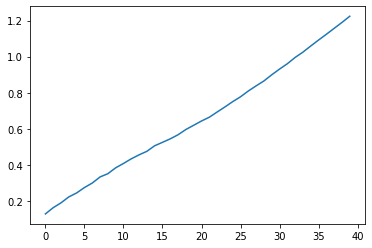

In [29]:
# Test with a reward function example:
def reward_function(state : StateMP1):
    return 0.01 * state.price

reward = [get_value_function(level_param = 15, f = reward_function, gamma = 0.7, 
                             state = StateMP1(i), maxRound = 100, num_traces = 100) 
          for i in range(1,41)]

_ = plt.plot(reward)

Simulated value function for each state:

In [30]:
for i in range(len(reward)):
    print("With starting price %d, reward is %.4f."%(i,reward[i]))

With starting price 0, reward is 0.1290.
With starting price 1, reward is 0.1636.
With starting price 2, reward is 0.1904.
With starting price 3, reward is 0.2233.
With starting price 4, reward is 0.2452.
With starting price 5, reward is 0.2750.
With starting price 6, reward is 0.3000.
With starting price 7, reward is 0.3337.
With starting price 8, reward is 0.3517.
With starting price 9, reward is 0.3843.
With starting price 10, reward is 0.4084.
With starting price 11, reward is 0.4341.
With starting price 12, reward is 0.4562.
With starting price 13, reward is 0.4756.
With starting price 14, reward is 0.5065.
With starting price 15, reward is 0.5255.
With starting price 16, reward is 0.5448.
With starting price 17, reward is 0.5676.
With starting price 18, reward is 0.5966.
With starting price 19, reward is 0.6200.
With starting price 20, reward is 0.6436.
With starting price 21, reward is 0.6645.
With starting price 22, reward is 0.6932.
With starting price 23, reward is 0.7214.
Wi